# trying to do some lasso regression analysis 

### imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### data prep

In [2]:
sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
s = sales[(sales.NA_Sales.notnull()  & sales.JP_Sales.notnull())]
s = sales[((sales.NA_Sales > 0) & (sales.JP_Sales > 0))]
s = s.sample(300, random_state = 0)
s = s.loc[s.NA_Sales.rank().sort_values().index]

X = s.NA_Sales.rank().values[:, np.newaxis]
y = s.JP_Sales.values[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### model time

Mean Squared Error: 0.2231151771284724
Coefficients: [0.07128863]


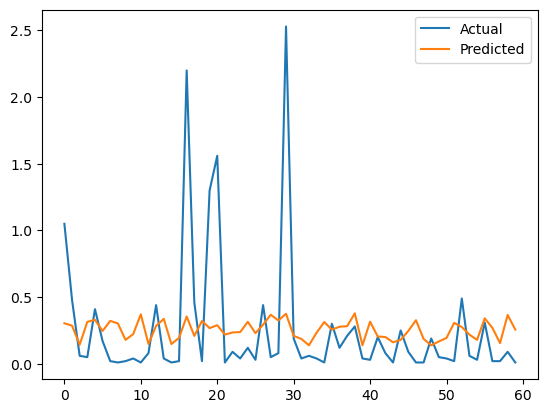

In [3]:
alpha = 0.1
lasso_model = Lasso(alpha = alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


coefficients = lasso_model.coef_
print(f'Coefficients: {coefficients}')


plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# wow what an insightful graph
## it looks like outliers really raise the predicted average a bit, could just use larger sample size though
## obviously this particular data is kind of non linear as some games will just randomly do way better than others in Japan so like yeah but it's still good practice 